In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data = df

<Axes: xlabel='TV', ylabel='Sales'>

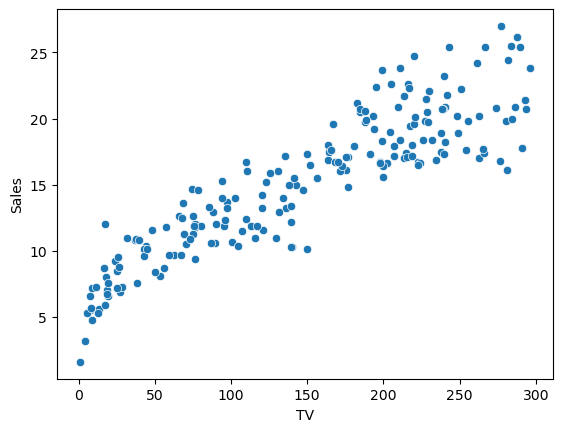

In [7]:
sns.scatterplot(data=data, x = 'TV', y = 'Sales') # advertising spend on TV vs Sales

<Axes: xlabel='Radio', ylabel='Sales'>

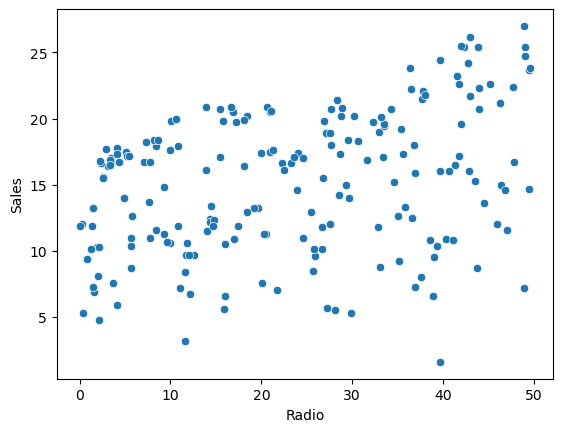

In [8]:
# Plotting a scatter plot
sns.scatterplot( data=data, x='Radio', y='Sales')  # advertising spend on Radio vs Sales

<Axes: xlabel='Newspaper', ylabel='Sales'>

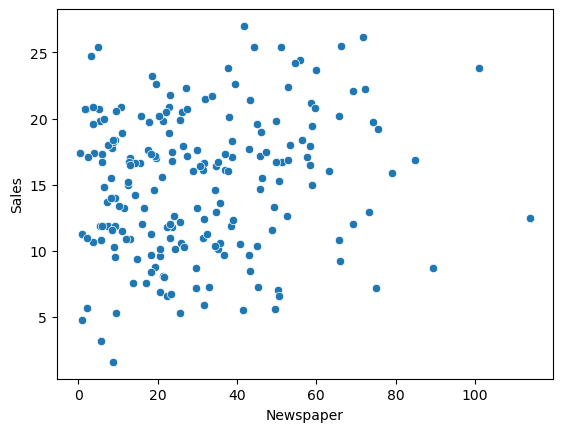

In [9]:
sns.scatterplot(data=data, x='Newspaper', y='Sales') # advertising spend on Newspaper vs Sales

### Linear Regression Modale

In [10]:
# splitting the dataset into X and y
X = data[['TV', 'Newspaper', 'Radio']]
y = np.array(data['Sales']).reshape(-1,1)

In [11]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
y_pred = reg.predict(X)
# Y_pred

In [13]:
# Find the Value of r-squred
r2_score(y, y_pred) # The three predictors considered explain about 90.25% of the variation in the datset

0.9025912899684558

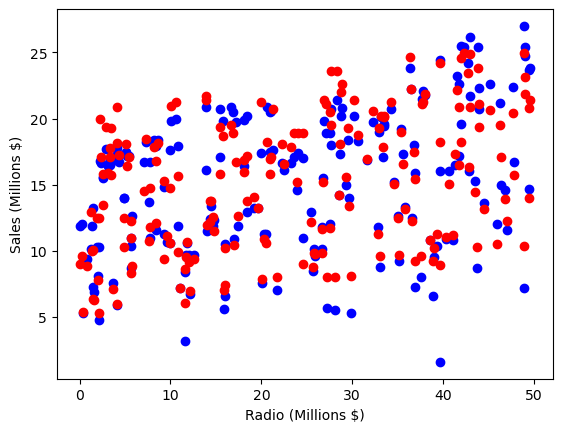

In [14]:
# Visual comparison between predicted and actual values
plt.scatter(X['Radio'], y, color = 'blue') # actual values
plt.scatter( X['Radio'], y_pred, color = 'red') # predicted values
plt.xlabel('Radio (Millions $)')
plt.ylabel('Sales (Millions $)')
plt.show()

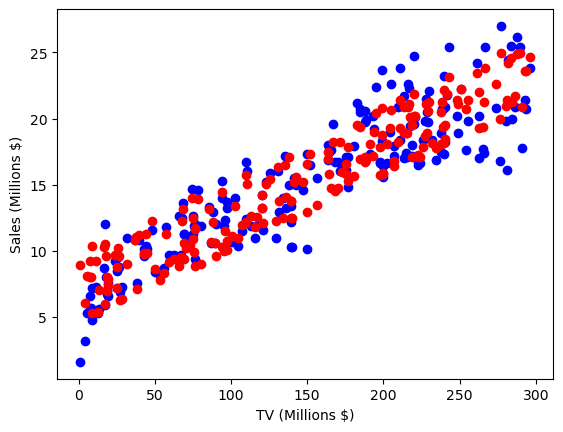

In [16]:
plt.scatter(X['TV'], y, color = 'blue') # Actual value
plt.scatter(X['TV'], y_pred, color = 'red') # Predicated Value
plt.xlabel('TV (Millions $)')
plt.ylabel('Sales (Millions $)')
plt.show()

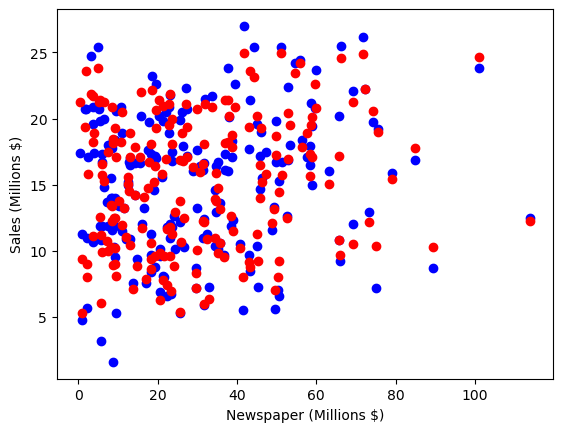

In [18]:
plt.scatter(X['Newspaper'],y, color = 'blue') # Actual value
plt.scatter(X['Newspaper'], y_pred,color = 'red')# predicted values
plt.xlabel('Newspaper (Millions $)')
plt.ylabel('Sales (Millions $)')
plt.show()

In [20]:
# Calculate beta coefficient.
print(reg.intercept_)
print(reg.coef_)

[4.62512408]
[[0.05444578 0.00033566 0.10700123]]


In [23]:
# Metrics to give an overall sens of error in the model
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

541.2012295254631
2.706006147627315
1.6449942697855562


In [25]:
# Residual analysis
y_res = y - y_pred
# y_res

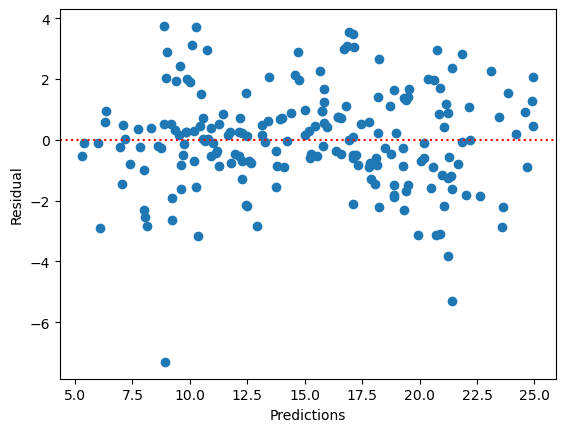

In [26]:
data['res'] = y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

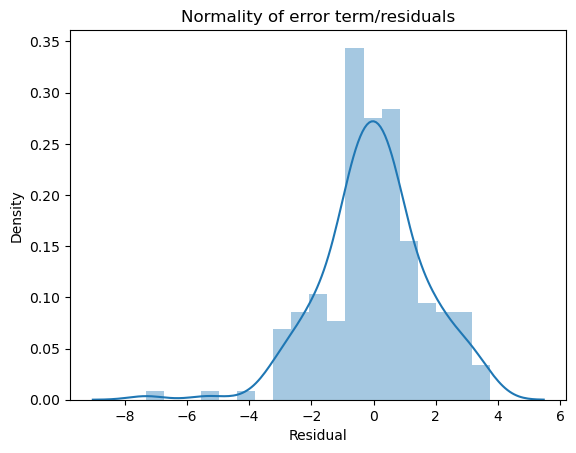

In [27]:
# Distribution of errors
p = sns.distplot(y_res, kde = True)

p = plt.title('Normality of error term/residuals')
plt.xlabel('Residual')
plt.show()

### Linear Regression Model Estimates  using Matrix Multiplications

In [28]:
# we use Numpy;s vstack to create a 2-d numpy array from two 1d-arrays and create x_mat
X_mat = np.vstack((np.ones(len(X)), X.T)).T

In [29]:
X_mat

array([[  1. , 230.1,  69.2,  37.8],
       [  1. ,  44.5,  45.1,  39.3],
       [  1. ,  17.2,  69.3,  45.9],
       [  1. , 151.5,  58.5,  41.3],
       [  1. , 180.8,  58.4,  10.8],
       [  1. ,   8.7,  75. ,  48.9],
       [  1. ,  57.5,  23.5,  32.8],
       [  1. , 120.2,  11.6,  19.6],
       [  1. ,   8.6,   1. ,   2.1],
       [  1. , 199.8,  21.2,   2.6],
       [  1. ,  66.1,  24.2,   5.8],
       [  1. , 214.7,   4. ,  24. ],
       [  1. ,  23.8,  65.9,  35.1],
       [  1. ,  97.5,   7.2,   7.6],
       [  1. , 204.1,  46. ,  32.9],
       [  1. , 195.4,  52.9,  47.7],
       [  1. ,  67.8, 114. ,  36.6],
       [  1. , 281.4,  55.8,  39.6],
       [  1. ,  69.2,  18.3,  20.5],
       [  1. , 147.3,  19.1,  23.9],
       [  1. , 218.4,  53.4,  27.7],
       [  1. , 237.4,  23.5,   5.1],
       [  1. ,  13.2,  49.6,  15.9],
       [  1. , 228.3,  26.2,  16.9],
       [  1. ,  62.3,  18.3,  12.6],
       [  1. , 262.9,  19.5,   3.5],
       [  1. , 142.9,  12.6,  29.3],
 

In [31]:
# we can implement this using Numpy's linalg module's matrix inverse function and matrix multiplication
bet_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [32]:
bet_hat

array([[4.62512408e+00],
       [5.44457803e-02],
       [3.35657922e-04],
       [1.07001228e-01]])

In [33]:
beta_hat_list = [bet_hat[i][0] for i in range(len(bet_hat))]
cofficients = ['b0','b1(TV)', 'b2(Radia)','b3(Newspaper)']
betas = dict(zip(cofficients,beta_hat_list))

In [35]:
betas

{'b0': 4.625124078808669,
 'b1(TV)': 0.05444578033757082,
 'b2(Radia)': 0.00033565792233046163,
 'b3(Newspaper)': 0.10700122823870287}